In [1]:
import pandas as pd
import geopy
import random
from shapely.geometry import shape, Point
import json
import folium
import os
import io

vols_df = pd.read_csv('sunburst_data_v2.csv')


x = io.open('continents.json','r')
y=json.load(x);

continents_shape = {}
continents_centroid = {}
geolocator = geopy.Nominatim(user_agent="4adgapplication")

for (key, item) in y.items():
    continents_shape[key] = shape(item['geometry'])
    loc = geolocator.geocode(query=key,geometry='geojson', language='en')
    continents_centroid[key] = [loc.latitude,loc.longitude]


In [105]:
unique_vols_df = vols_df.groupby('VolumeId')
points=[]
for id, item in unique_vols_df:
    region = item["Region"].unique()[0]
    centroid = continents_centroid[region]
    cur_shape = continents_shape[region]
    x=centroid[0]+random.randint(-10,10)
    y=centroid[1]+random.randint(-10,10)
    i=0
    while(i<10 and cur_shape.contains(Point(x,y))=='False'):
        x=centroid[0]+random.randint(-10,10)
        y=centroid[1]+random.randint(-10,10)
        i = i+1
    points.append([x,y,id,item["volumeSize"].unique()[0],item["volumeType"].unique()[0],item["Cost"].unique()[0]])   

In [199]:
x = io.open('europe.json','r')

m = folium.Map(
    location=[59.1759, 11.6016],
    tiles='cartodbpositron',
    zoom_start=2,
)
for p in points:
    choices = '123456789ABCDE'
    color = "#"+''.join([random.choice('56789ABCDE') for j in range(6)])
    darker=color
    darker = list(darker)
    for it1 in range(len(darker)):
        for it in range(len(choices)):
            if darker[it1]==choices[it]: 
                darker[it1]=choices[it-2]
                break
    darker = ''.join(darker)
    htmlString = '''
    <div style='font-family: sans-serif;'>
    <strong >Volume name:</strong> {name}<br>
    <strong >Volume size:</strong> {size}<br>
    <strong >Volume cost:</strong> {cost}<br>
    <strong >Volume type:</strong> {type}<br>
    </div>'''.format(name=p[2],size=p[3],cost=p[5],type=p[4]) 
    iframe = folium.IFrame(htmlString,width=325, height=100)
    folium.CircleMarker(
        location=[p[0],p[1]],
        radius=7,
        popup=folium.Popup(iframe, min_width=300, max_width=500, max_height=150, overflow_y='none'),
        fill=True,
        fill_color=color, 
        fill_opacity=1,
        color=darker, 
        opacity=1
    ).add_to(m)

# folium.PolyLine([random_europe[0],random_europe[1]]).add_to(m)
# folium.GeoJson(x.read(), name="geojson").add_to(m)
m
m.save('static/data/volumeMap.html')


In [192]:
from shapely.geometry import MultiPolygon, shape, Point
import json
x = io.open('europe.json','r')

y=json.load(x);
t=y['geometry']['coordinates']
z = shape(y['geometry'])
# p = Point((t[5][0][0][0]+t[5][0][10][0]+t[5][0][2][0])/3,(t[5][0][0][1]+t[5][0][1][1]+t[5][0][2][1])/3)
for point in random_europe:
    p = Point(point[1],point[0])
    print(z.contains(p), p)


True POINT (10 51)
True POINT (9 52)
True POINT (12 47)
True POINT (5 45)
True POINT (12 44)
True POINT (10 51)
True POINT (14 47)
True POINT (6 51)
True POINT (16 47)
True POINT (9 46)
True POINT (17 50)


In [63]:
import os

vols_df = pd.read_csv('sunburst_data_v2.csv')

vols_df[0:10]

order = ['CustomerId', 'ApplicationId', 'VolumeId', 'snapshotId']

def make_heirarchy(items, p_id, i):
    id_data = {
        "name" :  p_id,
        "children" : []
    }
    for id, item in items:
        if i!= (len(order)):
            res = make_heirarchy(item.groupby(order[i]), id, i+1)
            id_data["children"].append(res)
        else:
            id_data["children"].append({
                "name" : id,
                "size": int(float(item['volumeSize'].to_string(index=False))),
                "isAttached" : bool(item['isAttached'].to_string(index=False))
            })
    return id_data

d3_data=make_heirarchy(vols_df.groupby(order[0]), 'Data',1)
# d3_data

{'name': 'Data',
 'children': [{'name': 'CUST_00',
   'children': [{'name': 'App-01',
     'children': [{'name': 'vol-03a14dfdaf5c6722b',
       'children': [{'name': 'snap-0ed7eb835e8501dfa',
         'size': 50,
         'isAttached': True},
        {'name': 'snap-0ed7eb835e8501dfb', 'size': 50, 'isAttached': True},
        {'name': 'snap-0ed7eb835e8501dfc', 'size': 50, 'isAttached': True},
        {'name': 'snap-0ed7eb835e8501dfd', 'size': 50, 'isAttached': True},
        {'name': 'snap-0ed7eb835e8501dfe', 'size': 50, 'isAttached': True},
        {'name': 'snap-0ed7eb835e8501dff', 'size': 50, 'isAttached': True}]},
      {'name': 'vol-03a14dfdaf5c6723C',
       'children': [{'name': 'snap-0ed7eb835e8501dgb',
         'size': 200,
         'isAttached': True},
        {'name': 'snap-0ed7eb835e8501dgc', 'size': 200, 'isAttached': True},
        {'name': 'snap-0ed7eb835e8501dgd', 'size': 200, 'isAttached': True},
        {'name': 'snap-0ed7eb835e8501dge', 'size': 200, 'isAttached': Tru

In [106]:
import matplotlib.pyplot as plt
import networkx as nx
import PIL

# Image URLs for graph nodes
icons = {
    "customer": "static/images/customer.png",
    "application": "static/images/application.png",
    "volume": "static/images/volume.png",
    "snapshot": "static/images/snapshot.png",
}

# Load images
images = {k: PIL.Image.open(fname) for k, fname in icons.items()}

# Generate the computer network graph
G = nx.Graph()
pos = {};
c_num = 0
a_num = 0
v_num = 0
s_num = 0
for customer in d3_data['children']:  
    c_num = c_num + 1
    G.add_node("customer_"+customer['name'],name=customer['name'], type="customer", image=images["customer"])
    for application in customer['children']:
        a_num = a_num + 1
        G.add_node("application_"+application['name'], name=application['name'], type="application", image=images["application"])
        G.add_edge("customer_"+customer['name'],"application_"+application['name'])
        for volume in application['children']:
            v_num = v_num + 1
            G.add_node("volume_"+volume['name'], name=volume['name'], type="volume", image=images["volume"])
            G.add_edge("application_"+application['name'],"volume_"+volume['name'])        
            for snapshot in volume['children']:
                s_num = s_num + 1 
                G.add_node("snapshot_"+snapshot['name'], name=snapshot['name'], type="snapshot", image=images["snapshot"])
                G.add_edge("volume_"+volume['name'],"snapshot_"+snapshot['name'])        



In [107]:

c_cur = c_num
c_mul = 30
a_cur = a_num
a_mul = 20
v_cur = v_num
v_mul = 20
s_cur = s_num
s_mul = 5

for customer in d3_data['children']:  
    pos["customer_"+customer['name']]=[0, (c_num/2 - c_cur)*c_mul]
    c_cur = c_cur - 1
    for application in customer['children']:
        pos["application_"+application['name']]=[1, (a_num/2 - a_cur)*a_mul]
        a_cur = a_cur - 1
        for volume in application['children']:
            pos["volume_"+volume['name']]=[2, (v_num/2 - v_cur)*v_mul]
            v_cur = v_cur - 1
            for snapshot in volume['children']:
                pos["snapshot_"+snapshot['name']]=[3, (s_num/2 - s_cur)*s_mul]
                s_cur = s_cur - 1


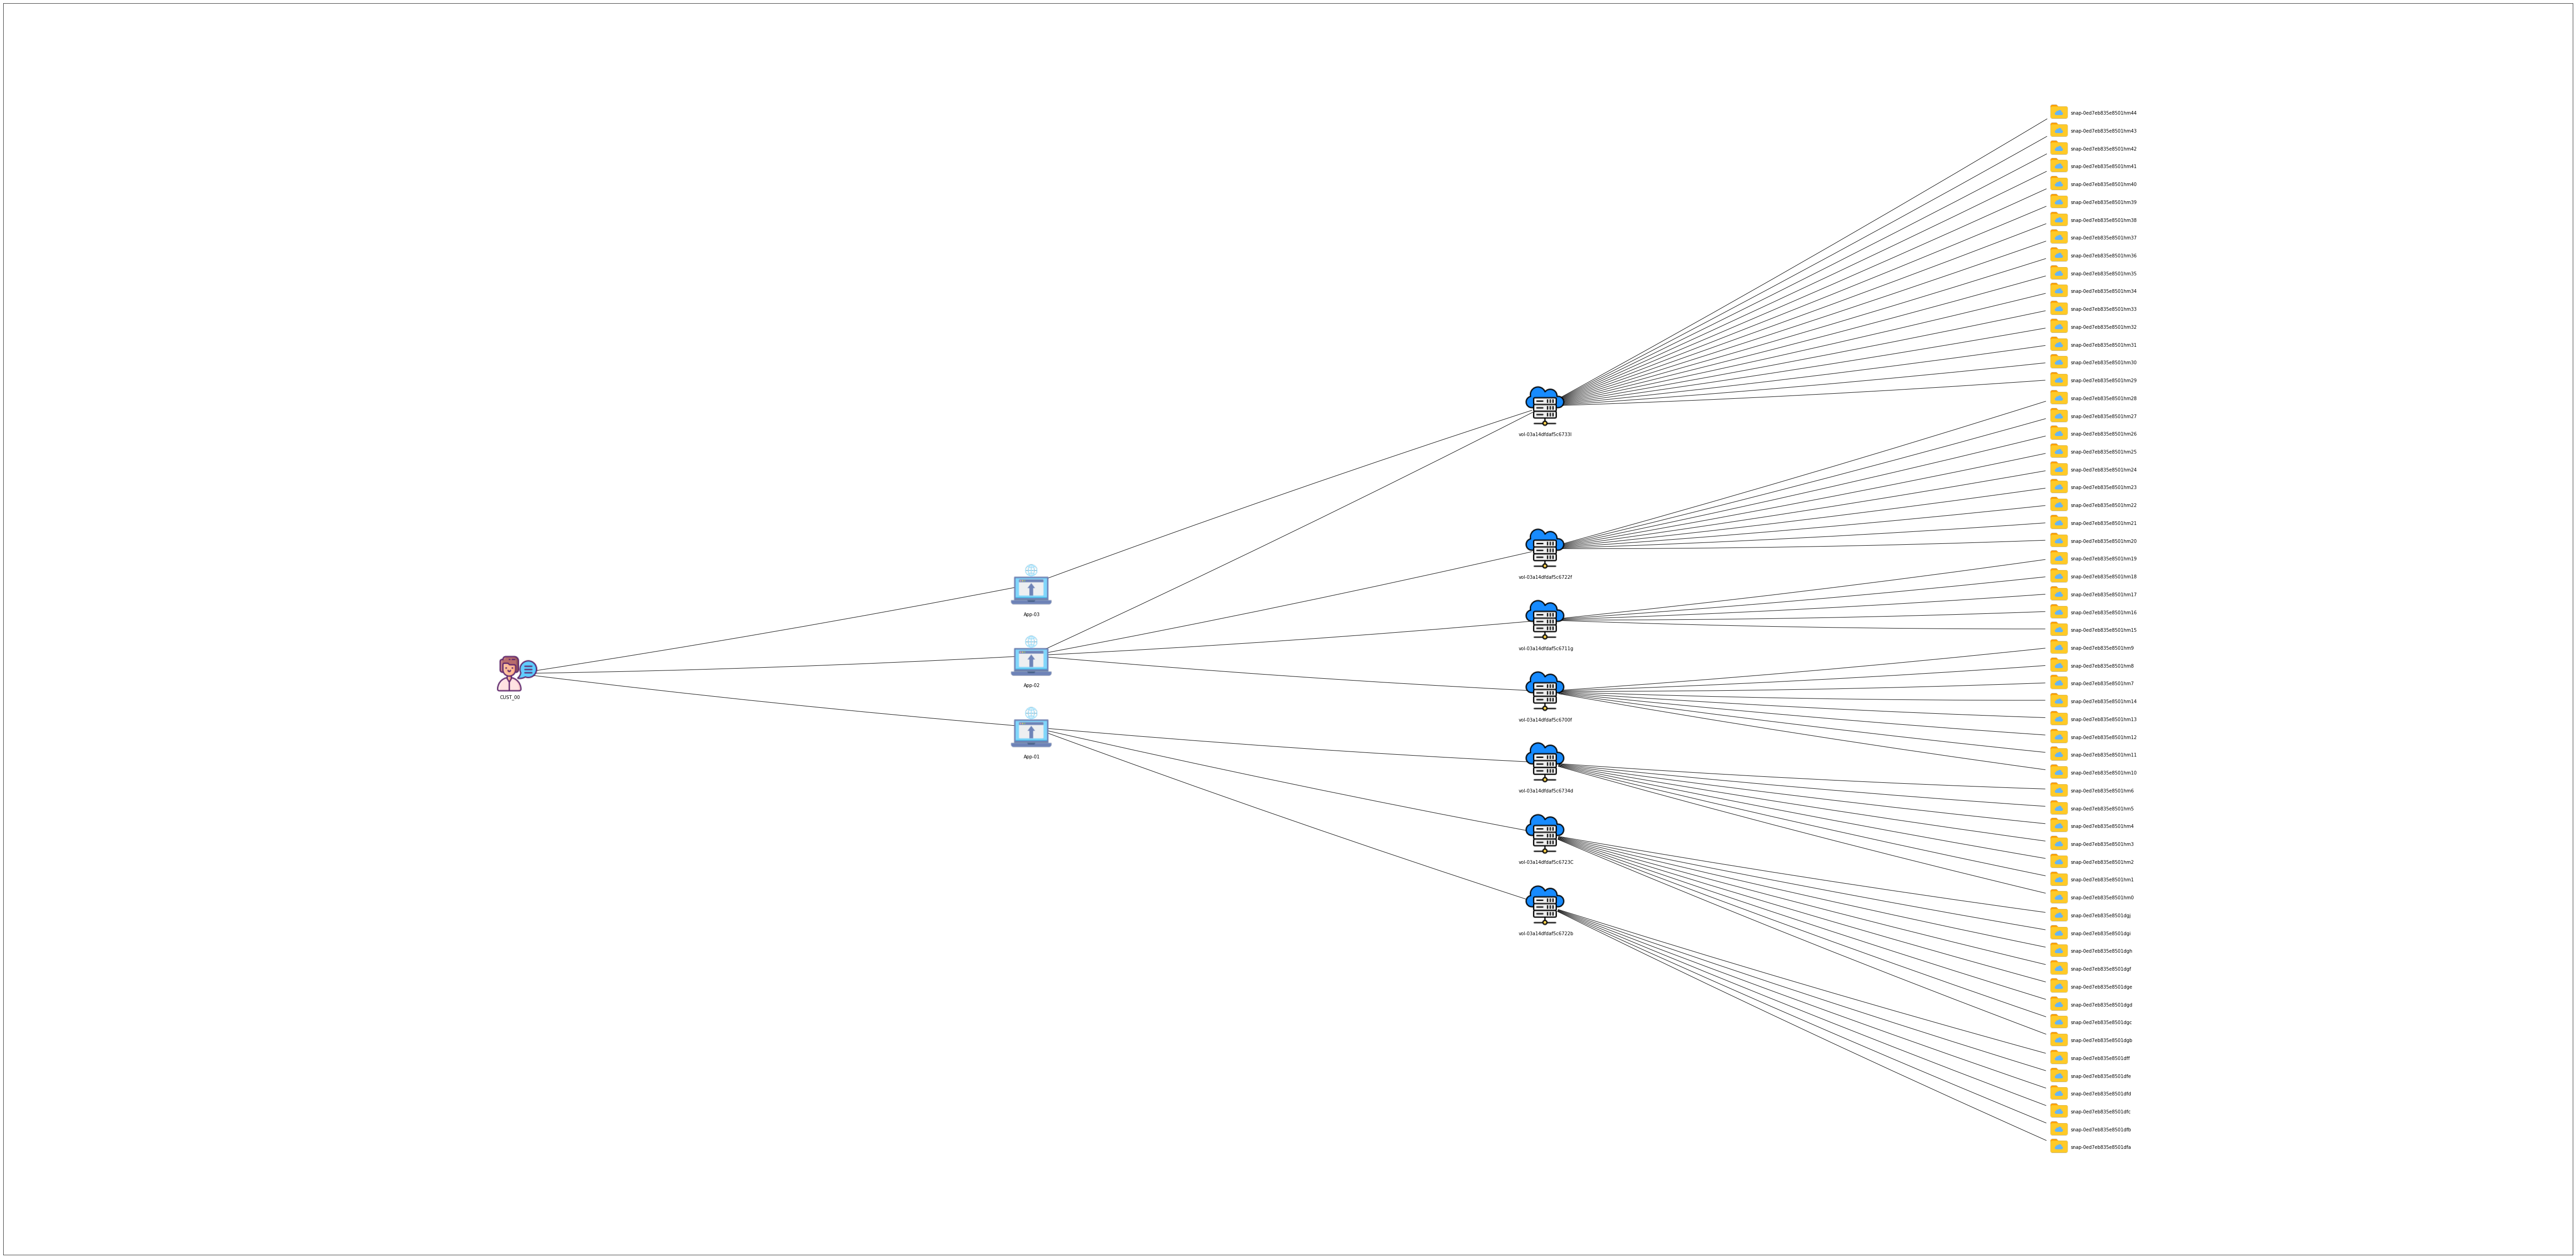

<Figure size 7200x3600 with 0 Axes>

In [146]:
fig, ax = plt.subplots()
ax.set_xlim(-1,4)

nx.draw_networkx_edges(
    G,
    pos=pos,
    ax=ax,
    arrows=True,
    arrowstyle="-",
    min_source_margin=30,
    min_target_margin=30,
    connectionstyle="Arc3,rad=0.01"
)

tr_figure = ax.transData.transform
tr_axes = fig.transFigure.inverted().transform

icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.005
icon_center = icon_size / 2.0

for n in G.nodes:
    xf, yf = tr_figure(pos[n])
    xa, ya = tr_axes((xf, yf))
    if(G.nodes[n]["type"]=='snapshot'):
        a = plt.axes([xa - icon_center*0.5, ya - icon_center*0.5, icon_size*0.5, icon_size*0.5])
    else:
        a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    a.imshow(G.nodes[n]["image"])
    if(G.nodes[n]["type"]=='snapshot'):
        a.text(50, 30, G.nodes[n]["name"])
    if(G.nodes[n]["type"]=='volume'):
        a.text(-10, 80, G.nodes[n]["name"])
    if(G.nodes[n]["type"]=='application'):
        a.text(20, 80, G.nodes[n]["name"])
    if(G.nodes[n]["type"]=='customer'):
        a.text(5, 70, G.nodes[n]["name"])
    a.axis("off")

f = plt.gcf()
plt.show()
plt.draw()
# os.remove('cust_00.png')
f.savefig('cust_00.png',dpi=100)

In [249]:
vols_df

,CustomerId,ApplicationId,VolumeId,volumeType,volumeSize,snapshotId,vol_creation_time,iops,snap_creation_time,isAttached,Cost,Region
0,CUST_00,App-01,vol-03a14dfdaf5c6722b,EBS,50.0,snap-0ed7eb835e8501dfa,2022-04-02T09:25:15.971000+00:00,10.0,2022-04-25T09:25:15.971000+00:00,True,200.0,Europe
1,CUST_00,App-01,vol-03a14dfdaf5c6722b,EBS,50.0,snap-0ed7eb835e8501dfb,2022-04-02T09:25:15.971000+00:00,10.0,2022-04-25T09:25:15.971000+00:00,True,200.0,Europe
2,CUST_00,App-01,vol-03a14dfdaf5c6722b,EBS,50.0,snap-0ed7eb835e8501dfc,2022-04-02T09:25:15.971000+00:00,10.0,2022-04-25T09:25:15.971000+00:00,True,200.0,Europe
3,CUST_00,App-01,vol-03a14dfdaf5c6722b,EBS,50.0,snap-0ed7eb835e8501dfd,2022-04-02T09:25:15.971000+00:00,10.0,2022-04-25T09:25:15.971000+00:00,True,200.0,Europe
4,CUST_00,App-01,vol-03a14dfdaf5c6722b,EBS,50.0,snap-0ed7eb835e8501dfe,2022-04-02T09:25:15.971000+00:00,10.0,2022-04-25T09:25:15.971000+00:00,True,200.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
67,NaN,NaN,NaN,NaN,NaN,snap-0ed7eb835e8501hm53,NaN,NaN,2022-04-27T09:26:15.971000+00:07,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,snap-0ed7eb835e8501hm54,NaN,NaN,2022-04-27T09:26:15.971000+00:07,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,snap-0ed7eb835e8501hm55,NaN,NaN,2022-04-27T09:26:15.971000+00:07,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,snap-0ed7eb835e8501hm56,NaN,NaN,2022-04-27T09:26:15.971000+00:07,NaN,NaN,NaN


In [237]:
def calc_cost(type,size):
    if(type=='EBS'):
        return 0.34744*size + 443.54859
    elif(type=='OnPrem'):
        res = 6.64344*size - 670.63115
        if(res<=0):
            return 200
        return res 
    

In [260]:
backup_json = []
for id,x in vols_df.groupby('VolumeId'):
    # if(x['volumeType']=='OnPrem'):
    for vol_id,y in x.iterrows(): 
        backup_json.append({
            'volumeId': y['VolumeId'],
            # 'type': y['volumeType'],
            'size': y['volumeSize'],
            'creation_time': y['vol_creation_time'],
            'region': y['Region'],
            'cost_estimate' :[calc_cost('EBS',y['volumeSize']),calc_cost('OnPrem',y['volumeSize'])],
            'iops': y['iops'],
            'backup_time': [str( round((y['volumeSize']/6),1)) + ' mins', str( round((y['volumeSize']/5),1)) + ' mins'] 
            })
        print(y['volumeType'],y['volumeSize'],y['iops'])
        break
# backup_json = vols_df[['VolumeId', 'volumeSize', 'vol_creation_time', 'Region']]
# backup_json['estimate'] = estimates
# backup_json
# vols_df
import json
json_data = json.dumps(backup_json)

json_data = 'json_data = \'' + json_data + '\''
# print(json_data)

with open("static/json/backup.json","w") as outfile:
        outfile.write(json_data)


EBS 100.0 500.0
OnPrem 120.0 50.0
EBS 50.0 10.0
EBS 600.0 1000.0
EBS 200.0 100.0
EBS 1100.0 400.0
OnPrem 300.0 400.0


In [240]:

seperate_str = '      . '
word_tree=[[0, 'CUST_00'+seperate_str, -1, 1 ,'black']]
i=0
ai = i
for app_id, app in vols_df.groupby('ApplicationId'):
    ai = ai+1
    word_tree.append([ai, app_id+seperate_str, i, 1,'black'])
    vi=ai
    for vol_id, vol in app.groupby('VolumeId'):
        vi = vi+1
        word_tree.append([vi, vol_id+seperate_str, ai, 1,'black'])
        si=vi
        for snap_id, snap in vol.groupby('snapshotId'):
            si = si+1
            word_tree.append([si, snap_id, vi, 1,'black'])
        vi=si+1
    ai=vi+1

import json
json_data = json.dumps(word_tree)

json_data = 'json_data = \'' + json_data + '\''
print(json_data)

with open("static/json/wordtree.json","w") as outfile:
        outfile.write(json_data)



C:\Users\Sriram\AppData\Local\Temp\ipykernel_15516\306282653.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backup_json['estimate'] = estimates
